# Solar Power Generation Forecasting

In [70]:
import numpy as np # To perform numerical operations
import pandas as pd # To do data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For advanced Data visualizations
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from datetime import datetime
import joblib

In [71]:
generation_data = pd.read_csv('./data/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')

In [72]:
generation_data.head(5)
weather_data.head(5) 

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,15-05-2020 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,15-05-2020 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,15-05-2020 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,15-05-2020 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [73]:
print(type(generation_data['DATE_TIME']))
print(type(weather_data['DATE_TIME']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [74]:
generation_data.info()
generation_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [75]:
weather_data.info()
generation_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [76]:
# before merging the datasets we ne to convert date time format for proper time alignement

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], dayfirst=True) # Parsing the date string in the format of Day/month/year
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_19916\3061792517.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])


In [77]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [78]:
generation_agg = generation_data.groupby('DATE_TIME').agg({
    'DC_POWER':'sum', #calculating the sum of DC_Power
    'AC_POWER':'sum', #calculating the sum of AC_POWER
    'DAILY_YIELD' : 'mean', #calculating the average of DAILY_YEILD
    'TOTAL_YIELD' : 'mean' #calculating the average of TOTAL_YIELD
}).reset_index() # Used to control and manage the structure of a Dataframe's Index

In [79]:
# aggregating Weather Sensor Data
weather_agg = weather_data.groupby('DATE_TIME').agg({
    'AMBIENT_TEMPERATURE' : 'mean', #calculating average AMBIENT_TEMPERATURE
    'MODULE_TEMPERATURE' : 'mean', #calculating average MODULE_TEMPERATURE
    'IRRADIATION' : 'mean' #calculating average IRRADIATION
}).reset_index()

In [80]:
# df = pd.merge(generation_agg,weather_agg,on='DATE_TIME',how='inner') #how carries other values like outer, left and right

In [81]:
# df.describe()

In [82]:
df = pd.read_csv('./Plant1_Merged_Dataset.csv')
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3157.000000,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000
mean,68560.019625,6704.830534,3324.402716,6.977422e+06,25.560257,31.175453,0.230103
std,88055.843520,8604.217954,3045.292432,7.513782e+04,3.351059,12.272685,0.301348
min,0.000000,0.000000,0.000000,6.635010e+06,20.398505,18.140415,0.000000
25%,0.000000,0.000000,4.124188,6.917337e+06,22.739895,21.130249,0.000000
50%,8430.196429,814.880357,3009.619318,6.981686e+06,24.680324,24.801971,0.027748
75%,140409.892900,13752.112500,6094.517045,7.045256e+06,27.941221,41.449481,0.451576
max,298937.785700,29150.212500,8807.727273,7.097398e+06,35.252486,65.545714,1.221652


In [83]:
df.isnull().sum()

DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

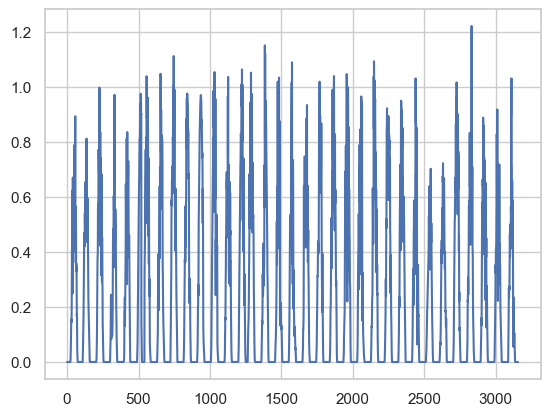

In [84]:
plt.plot(df['IRRADIATION'])

In [85]:
# Finds the relationship between the features
correlation_matrix = df.corr(numeric_only=True)

In [86]:
correlation_matrix

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.999997,0.075897,-0.009787,0.725679,0.960939,0.995957
AC_POWER,0.999997,1.000000,0.075839,-0.009706,0.725879,0.961011,0.995864
DAILY_YIELD,0.075897,0.075839,1.000000,0.019176,0.491900,0.198208,0.073364
TOTAL_YIELD,-0.009787,-0.009706,0.019176,1.000000,-0.202452,-0.076345,-0.017062
AMBIENT_TEMPERATURE,0.725679,0.725879,0.491900,-0.202452,1.000000,0.853162,0.721839
MODULE_TEMPERATURE,0.960939,0.961011,0.198208,-0.076345,0.853162,1.000000,0.961422
IRRADIATION,0.995957,0.995864,0.073364,-0.017062,0.721839,0.961422,1.000000


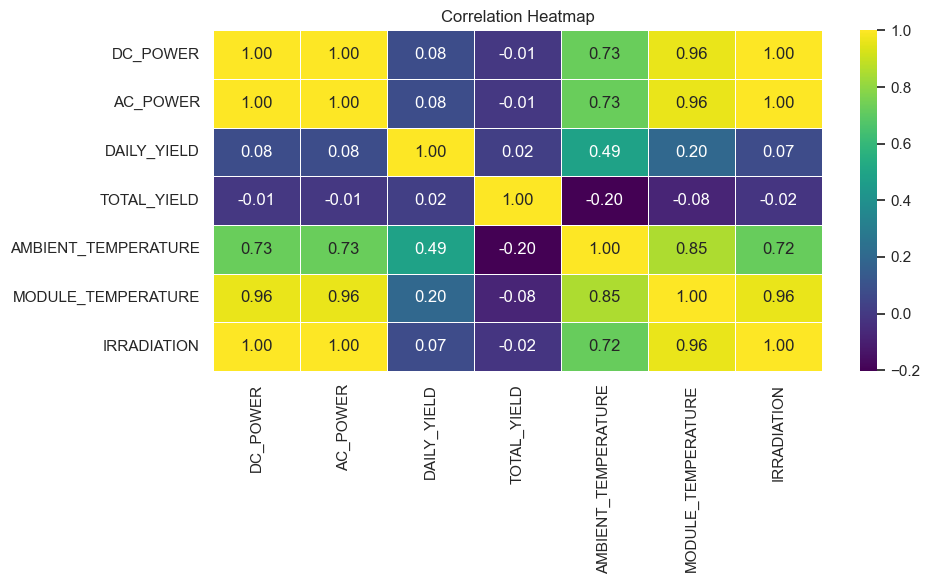

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

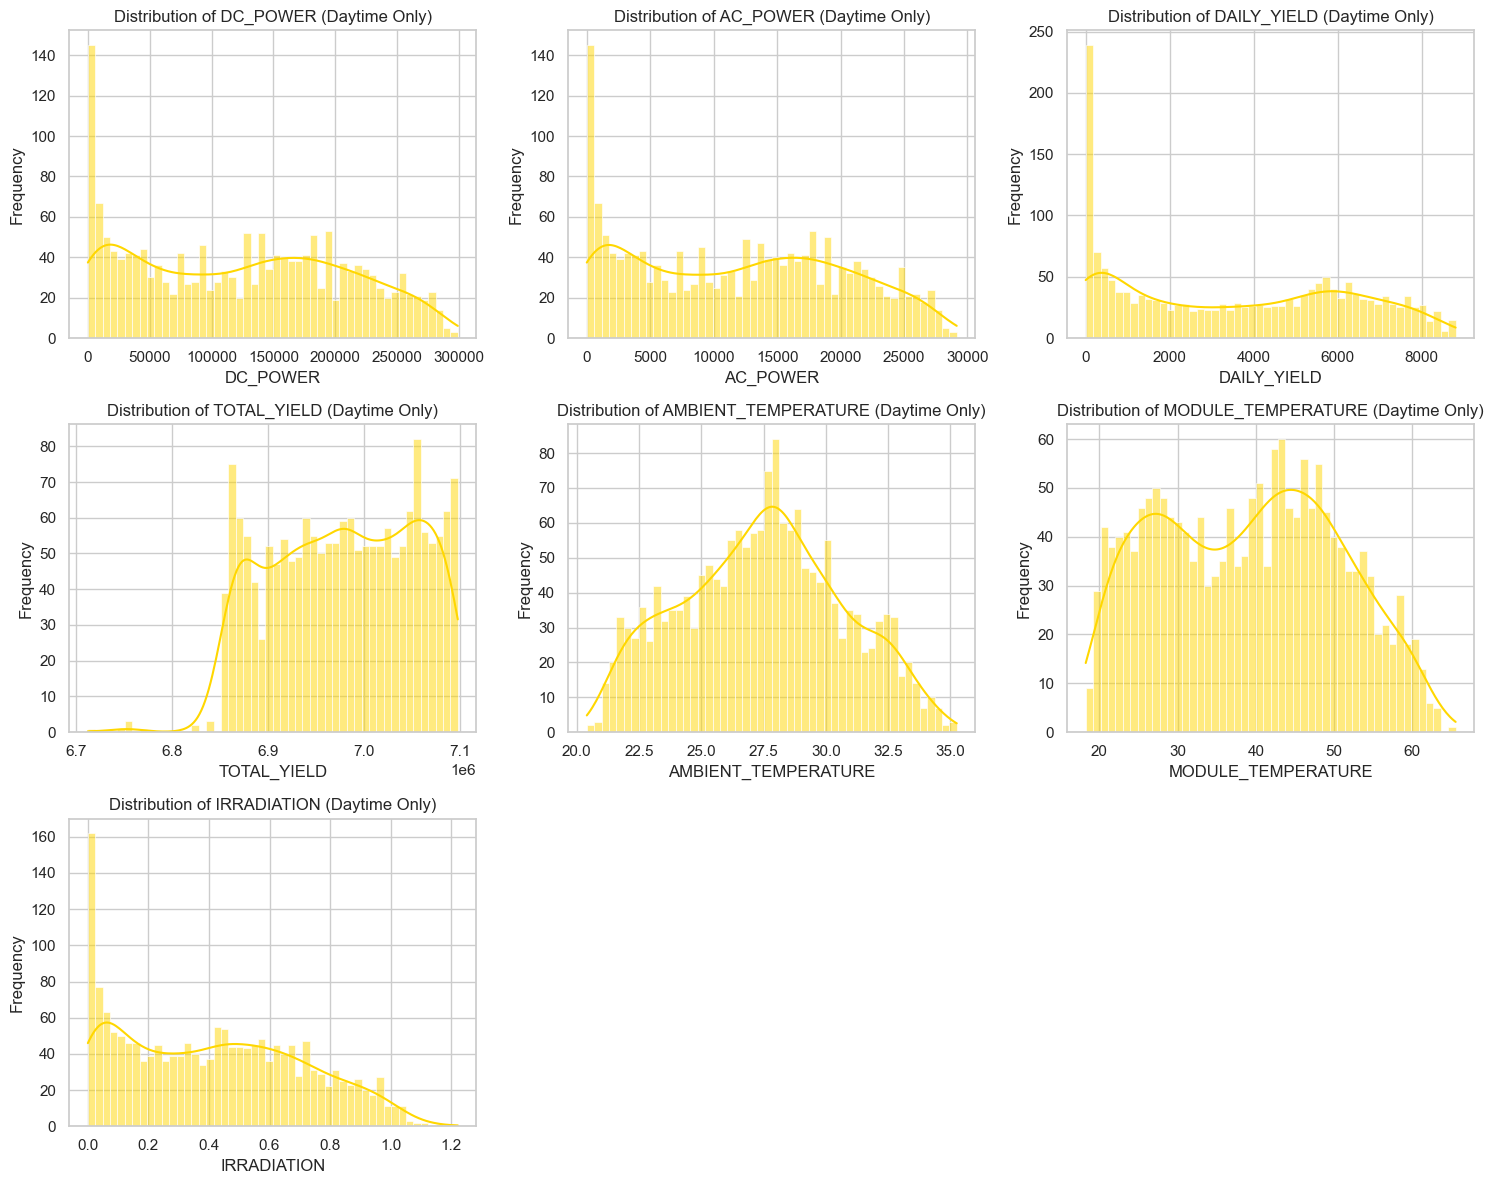

In [88]:
daytime_data = df[df['IRRADIATION']>0] # filtering only the day time data by setting Irridation > 0

numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns # selecting only numeric columns from the dataframe

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=daytime_data, x=col, kde=True, bins=50, color='gold')
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


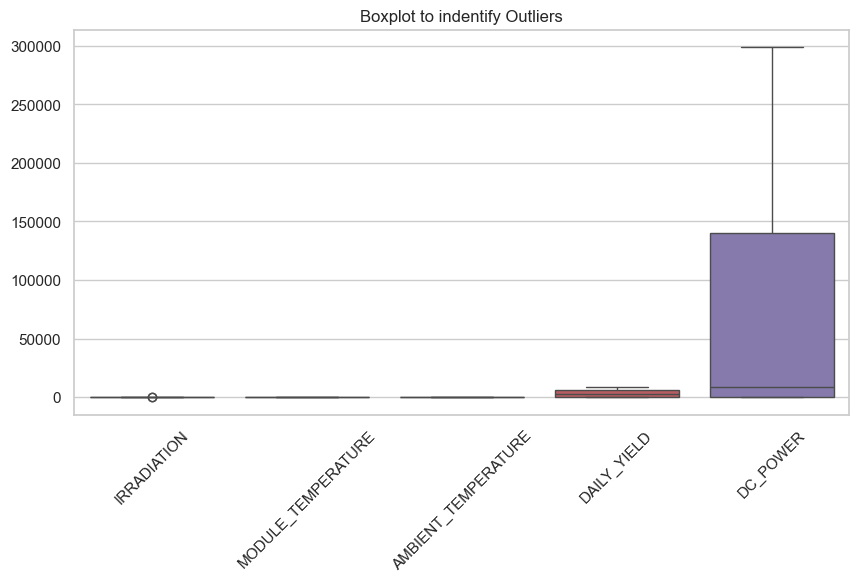

In [89]:
# Using these features to visualize the box plot to identify the outliers in a dataframe
Features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER'
]
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[Features])
plt.title("Boxplot to indentify Outliers")
plt.xticks(rotation=45)
plt.show()


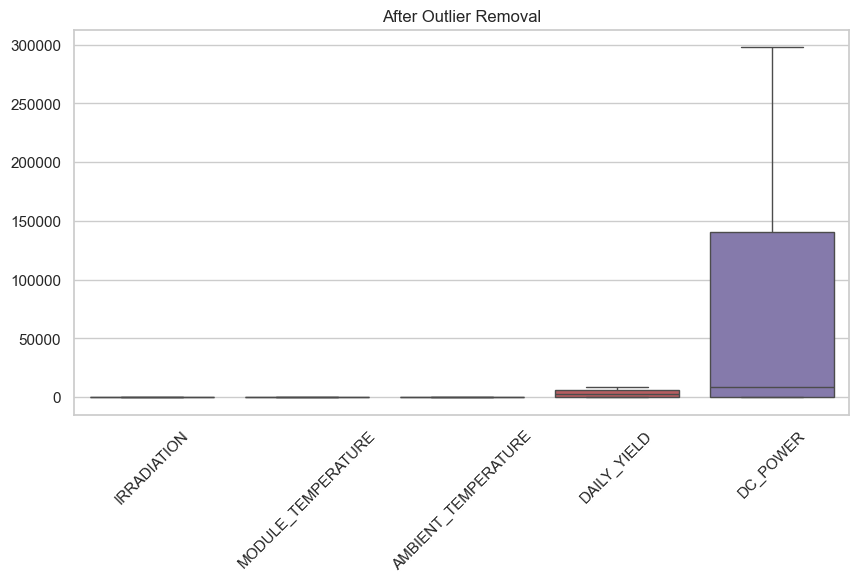

In [90]:
# creating a copy to avoid the changes in original data
Data_Clean = df.copy()


#applying IQR method to remove the outliers
for col in Features:
    Q1 = Data_Clean[col].quantile(0.25)
    Q3 = Data_Clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data_Clean = Data_Clean[(Data_Clean[col] >= lower_bound) & (Data_Clean[col] <= upper_bound)]

#Visualizing the box plot after removing the outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=Data_Clean[Features])
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()


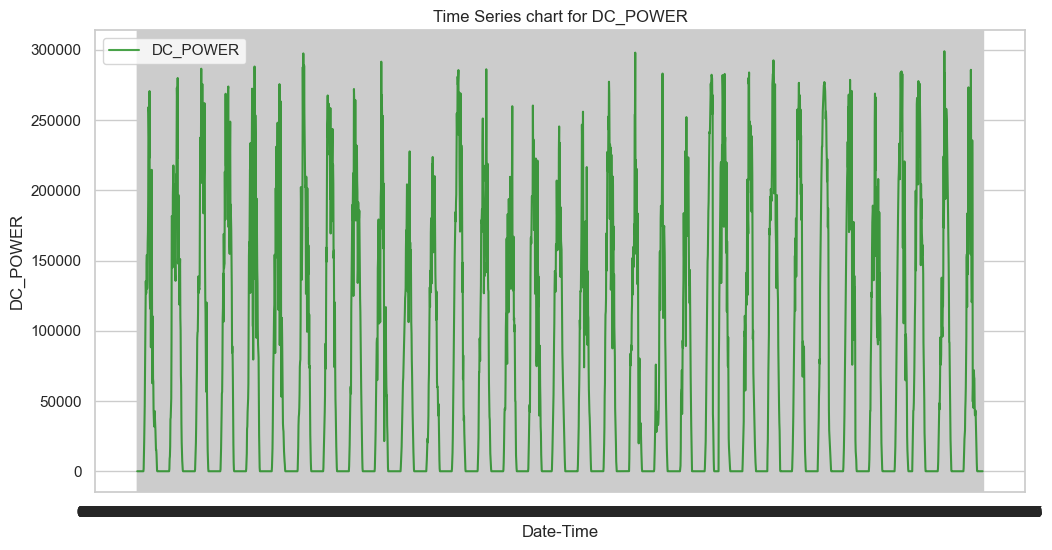

In [91]:
df.set_index('DATE_TIME', inplace=True)
df.sort_index(inplace=True)

# Plot DC_POWER time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DC_POWER'], color="green", alpha=0.7, label="DC_POWER")

plt.title("Time Series chart for DC_POWER")
plt.xlabel("Date-Time")
plt.ylabel("DC_POWER")
plt.legend()
plt.show()



In [92]:
features_to_scale = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER',
    'AC_POWER' 
]
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df_standardized.head())

                  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DATE_TIME                                                        
01-06-2020 00:00  -0.77872 -0.779373    -1.011104  6978158.182   
01-06-2020 00:15  -0.77872 -0.779373    -1.091826  6978158.182   
01-06-2020 00:30  -0.77872 -0.779373    -1.091826  6978158.182   
01-06-2020 00:45  -0.77872 -0.779373    -1.091826  6978158.182   
01-06-2020 01:00  -0.77872 -0.779373    -1.091826  6978158.182   

                  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                                               
01-06-2020 00:00            -0.725731           -0.872901    -0.763699  
01-06-2020 00:15            -0.754417           -0.882915    -0.763699  
01-06-2020 00:30            -0.773837           -0.888778    -0.763699  
01-06-2020 00:45            -0.820665           -0.894529    -0.763699  
01-06-2020 01:00            -0.880106           -0.903742    -0.763699  


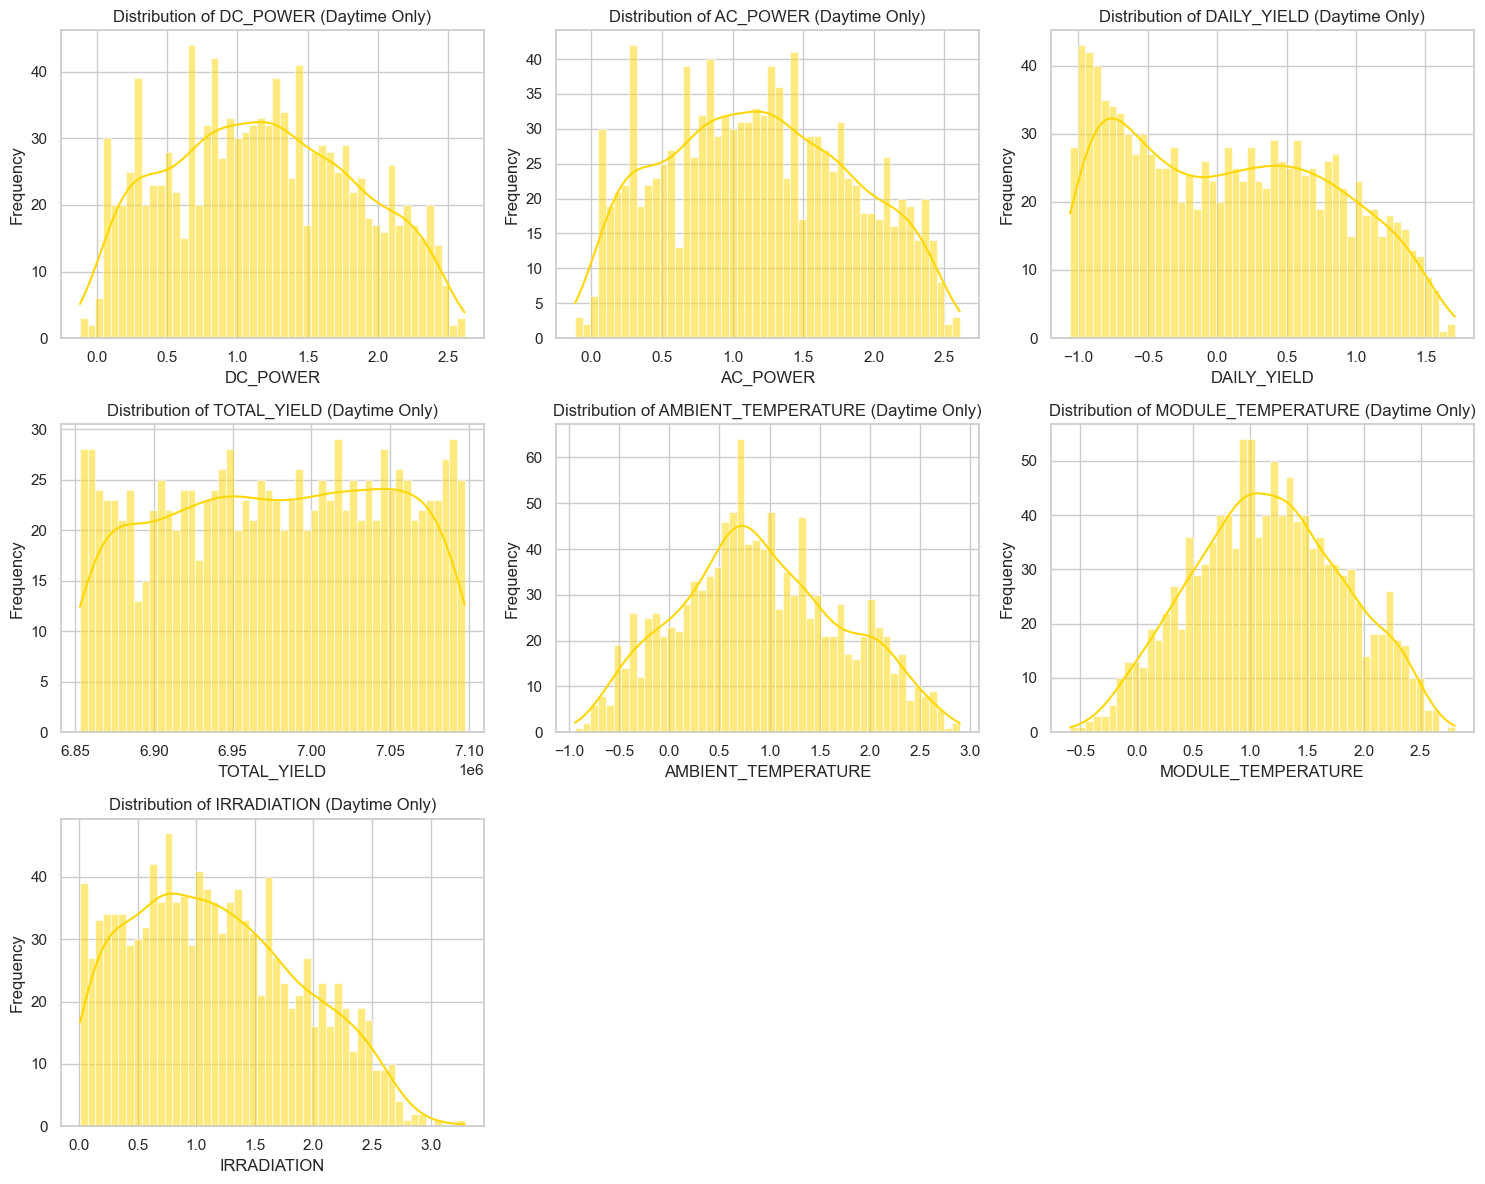

In [93]:
daytime_data = df_standardized[df_standardized['IRRADIATION']>0] # filtering only the day time data by setting Irridation > 0

numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns # selecting only numeric columns from the dataframe

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=daytime_data, x=col, kde=True, bins=50, color='gold')
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


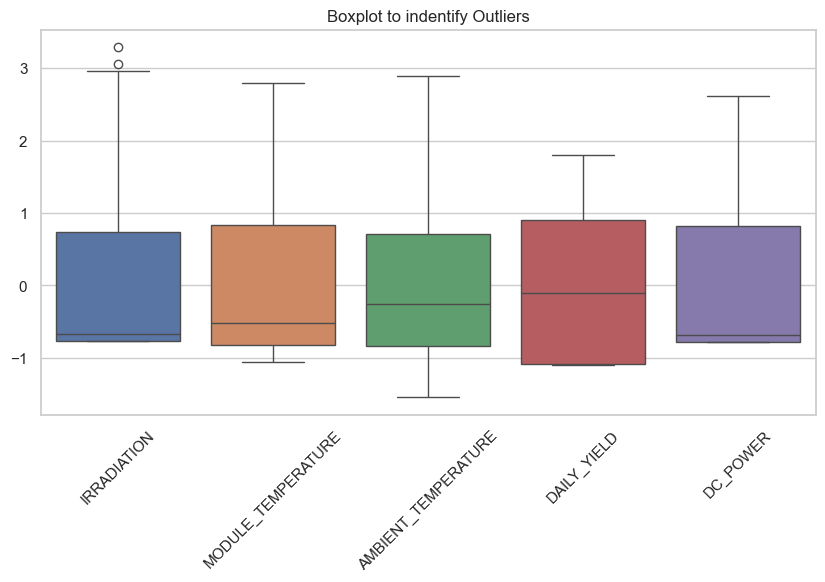

In [94]:
# Using these features to visualize the box plot to identify the outliers in a dataframe
Features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER'
]
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_standardized[Features])
plt.title("Boxplot to indentify Outliers")
plt.xticks(rotation=45)
plt.show()
